In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
from bellem.utils import jprint

In [ ]:
from bellem.dvc.experiment import load_experiments

filenames = [
    "musique.json",
]

experiments = [exp for filename in filenames for exp in load_experiments(filename)]
print(f"{len(experiments)} experiments")
experiments[0]

10 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'train': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'train'},
   'optimizer': 'noop'},
  'evaluation': {'dataset': {'path': 'bdsaglam/musique',
    'name': 'answerable',
    'split': 'validation'}},
  'qa': {'model': 'llama-3-70b-tgi',
   'temperature': 0.1,
   'technique': 'standard'},
  'run': 1},
 'metrics': {}}

In [3]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id"])
df = df[df["params.evaluation.dataset.path"] == "bdsaglam/musique"].copy()
df.drop(columns=[col for col in df.columns if 'fuzzy' in col], inplace=True)

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.dropna(subset=param_cols + metric_cols, inplace=True, how="any")
df.drop_duplicates(subset=param_cols, inplace=True)
df

,name,params.train.dataset.path,params.train.dataset.name,params.train.dataset.split,params.train.optimizer,params.evaluation.dataset.path,params.evaluation.dataset.name,params.evaluation.dataset.split,params.qa.model,params.qa.temperature,params.qa.technique,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
1,gauzy-tare,bdsaglam/musique-mini,answerable,train,bfsrs-medium,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cte,1,0.651634,0.761779,0.684505,0.791327,0.639474,0.761074,0.572840,0.671757
2,wiser-trug,bdsaglam/musique-mini,answerable,train,bfsrs-medium,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cot,1,0.630947,0.738555,0.651757,0.761745,0.642105,0.756449,0.545679,0.633286
3,every-boar,bdsaglam/musique-mini,answerable,train,bfsrs-medium,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,standard,1,0.614398,0.733413,0.640575,0.765884,0.640789,0.750432,0.483951,0.601099
4,sunny-vina,bdsaglam/musique-mini,answerable,train,bfs-medium,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cte,1,0.635912,0.752128,0.677316,0.780428,0.603947,0.753597,0.567901,0.661884
5,wroth-sled,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cte,1,0.595780,0.706427,0.631789,0.738631,0.585526,0.713075,0.503704,0.594395
6,flamy-salt,bdsaglam/musique-mini,answerable,train,bfs-medium,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cot,1,0.606951,0.719380,0.634984,0.747320,0.609211,0.728952,0.516049,0.615043
7,awing-tirl,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,cot,1,0.607365,0.709671,0.630990,0.737272,0.614474,0.724702,0.520988,0.596138
8,blest-ghat,bdsaglam/musique-mini,answerable,train,bfs-medium,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,standard,1,0.600745,0.731624,0.638978,0.767954,0.600000,0.733464,0.483951,0.615863
9,piano-rims,bdsaglam/musique-mini,answerable,train,noop,bdsaglam/musique,answerable,validation,llama-3-70b-tgi,0.1,standard,1,0.562267,0.685245,0.604633,0.724026,0.568421,0.697955,0.419753,0.541510


In [4]:
target_params = ["params.qa.technique", "params.train.optimizer", "params.qa.temperature"]

In [5]:
run_counts = df.groupby(target_params)[metric_cols[:1]].count().reset_index()
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match
0,cot,bfs-medium,0.1,1
1,cot,bfsrs-medium,0.1,1
2,cot,noop,0.1,1
3,cte,bfs-medium,0.1,1
4,cte,bfsrs-medium,0.1,1
5,cte,noop,0.1,1
6,standard,bfs-medium,0.1,1
7,standard,bfsrs-medium,0.1,1
8,standard,noop,0.1,1


In [6]:
target_params

['params.qa.technique', 'params.train.optimizer', 'params.qa.temperature']

In [7]:
# Average metrics over repeated runs (params.run)
df_target = df.groupby(target_params)[metric_cols].max().reset_index()
df_target[[*target_params, *metric_cols[:2]]].sort_values("metrics.f1", ascending=False)

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1
4,cte,bfsrs-medium,0.1,0.651634,0.761779
3,cte,bfs-medium,0.1,0.635912,0.752128
1,cot,bfsrs-medium,0.1,0.630947,0.738555
7,standard,bfsrs-medium,0.1,0.614398,0.733413
6,standard,bfs-medium,0.1,0.600745,0.731624
0,cot,bfs-medium,0.1,0.606951,0.719380
2,cot,noop,0.1,0.607365,0.709671
5,cte,noop,0.1,0.595780,0.706427
8,standard,noop,0.1,0.562267,0.685245


In [8]:
_df = df_target[target_params + metric_cols[:2]].copy()
_df = _df.set_index(["params.qa.technique", "params.train.optimizer"])

# Define the desired order for the second index
technique_order = ["standard", "cot", "cte"]
optimizer_order = ["noop", "bfs-medium", "bfsrs-medium"]

# Reindex the DataFrame to apply the desired order to the second index
_df = _df.reindex(
    index=pd.MultiIndex.from_product(
        [technique_order, optimizer_order],
        names=_df.index.names,
    )
)

# Set precision for metric columns
_df[metric_cols[:2]] = _df[metric_cols[:2]].map(lambda x: round(x, 3))

# Display the styled DataFrame
display(_df)


params.qa.temperature  \
params.qa.technique params.train.optimizer                          
standard            noop                                      0.1   
                    bfs-medium                                0.1   
                    bfsrs-medium                              0.1   
cot                 noop                                      0.1   
                    bfs-medium                                0.1   
                    bfsrs-medium                              0.1   
cte                 noop                                      0.1   
                    bfs-medium                                0.1   
                    bfsrs-medium                              0.1   

                                            metrics.exact_match  metrics.f1  
params.qa.technique params.train.optimizer                                   
standard            noop                                  0.562       0.685  
                    bfs-medium                            0.601       0.732  
                    bfsrs-medium                          0.614       0.733  
cot                 noop                                  0.607       0.710  
                    bfs-medium                            0.607       0.719  
                    bfsrs-medium                          0.631       0.739  
cte                 noop                                  0.596       0.706  
                    bfs-medium                            0.636       0.752  
                    bfsrs-medium                          0.652       0.762

In [9]:
# Group by technique and find the best optimizer for each technique
best_per_technique = df_target.loc[df_target.groupby("params.qa.technique")["metrics.f1"].idxmax(), target_params + metric_cols[:2]]

# Sort techniques by best F1 score
best_per_technique = best_per_technique.sort_values(by="metrics.f1", ascending=False)

# Highlight the maximum F1 score in bold using Styler
styled_df = best_per_technique.style.highlight_max(subset=["metrics.f1"], props="font-weight: bold;").format(precision=3)

# Display the best optimizers per technique as a styled DataFrame
display(styled_df)

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1
4,cte,bfsrs-medium,0.100,0.652,0.762
1,cot,bfsrs-medium,0.100,0.631,0.739
7,standard,bfsrs-medium,0.100,0.614,0.733


In [ ]:
jprint([
    {
        "technique": record["params.qa.technique"],
        "optimization": "auto/" + record["params.train.optimizer"],
        "exact_match": record["metrics.exact_match"],
        "f1": record["metrics.f1"],
    }
    for record in best_per_technique.to_dict(orient="records")
])

[
  {
    "technique": "cte",
    "optimization": "auto/bfsrs-medium",
    "exact_match": 0.6516342573438146,
    "f1": 0.7617787143455554
  },
  {
    "technique": "cot",
    "optimization": "auto/bfsrs-medium",
    "exact_match": 0.630947455523376,
    "f1": 0.7385545309503733
  },
  {
    "technique": "standard",
    "optimization": "auto/bfsrs-medium",
    "exact_match": 0.6143980140670252,
    "f1": 0.7334134940806772
  }
]


,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1
4,cte,bfsrs-medium,0.100,0.652,0.762
1,cot,bfsrs-medium,0.100,0.631,0.739
7,standard,bfsrs-medium,0.100,0.614,0.733


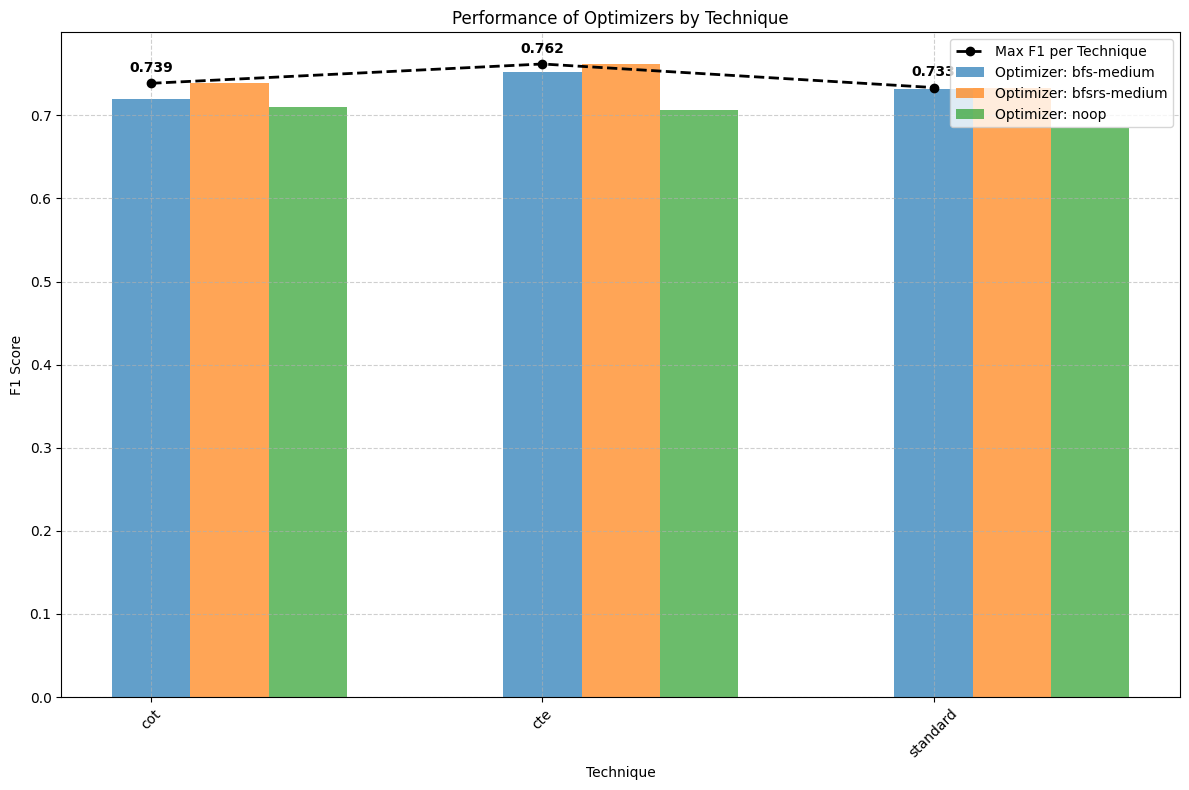

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from IPython.display import display

# Group by technique and find the best optimizer for each technique
best_per_technique = df_target.loc[df_target.groupby("params.qa.technique")["metrics.f1"].idxmax(), target_params + metric_cols[:2]]

# Sort techniques by best F1 score
best_per_technique = best_per_technique.sort_values(by="metrics.f1", ascending=False)

# Highlight the maximum F1 score in bold using Styler and format to 3 decimal places
styled_df = best_per_technique.style.highlight_max(subset=["metrics.f1"], props="font-weight: bold;").format(precision=3)

# Display the best optimizers per technique as a styled DataFrame
display(styled_df)

# Bar and Line Plot for Techniques and Optimizers
techniques = df_target["params.qa.technique"].unique()
optimizers = df_target["params.train.optimizer"].unique()

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.2  # Bar width
x = np.arange(len(techniques))  # X positions for techniques

# Prepare data for plotting
bar_offsets = {optimizer: idx - len(optimizers) // 2 for idx, optimizer in enumerate(range(len(optimizers)))}

# Plot bars for each optimizer
for idx, optimizer in enumerate(optimizers):
    optimizer_f1 = [
        df_target[(df_target["params.qa.technique"] == technique) & (df_target["params.train.optimizer"] == optimizer)]["metrics.f1"].max()
        for technique in techniques
    ]
    ax.bar(x + width * idx, optimizer_f1, width, label=f"Optimizer: {optimizer}", alpha=0.7)

# Plot line for maximum F1 per technique
max_f1_per_technique = [df_target[df_target["params.qa.technique"] == technique]["metrics.f1"].max() for technique in techniques]
ax.plot(x, max_f1_per_technique, label="Max F1 per Technique", color="black", linestyle="--", marker="o", linewidth=2)

# Annotate the maximum F1 line
for i, f1_value in enumerate(max_f1_per_technique):
    ax.text(x[i], f1_value + 0.01, f"{f1_value:.3f}", ha="center", va="bottom", fontsize=10, fontweight="bold")

# Add legend and titles
ax.set_title("Performance of Optimizers by Technique")
ax.set_xlabel("Technique")
ax.set_ylabel("F1 Score")
ax.set_xticks(x)
ax.set_xticklabels(techniques, rotation=45)
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

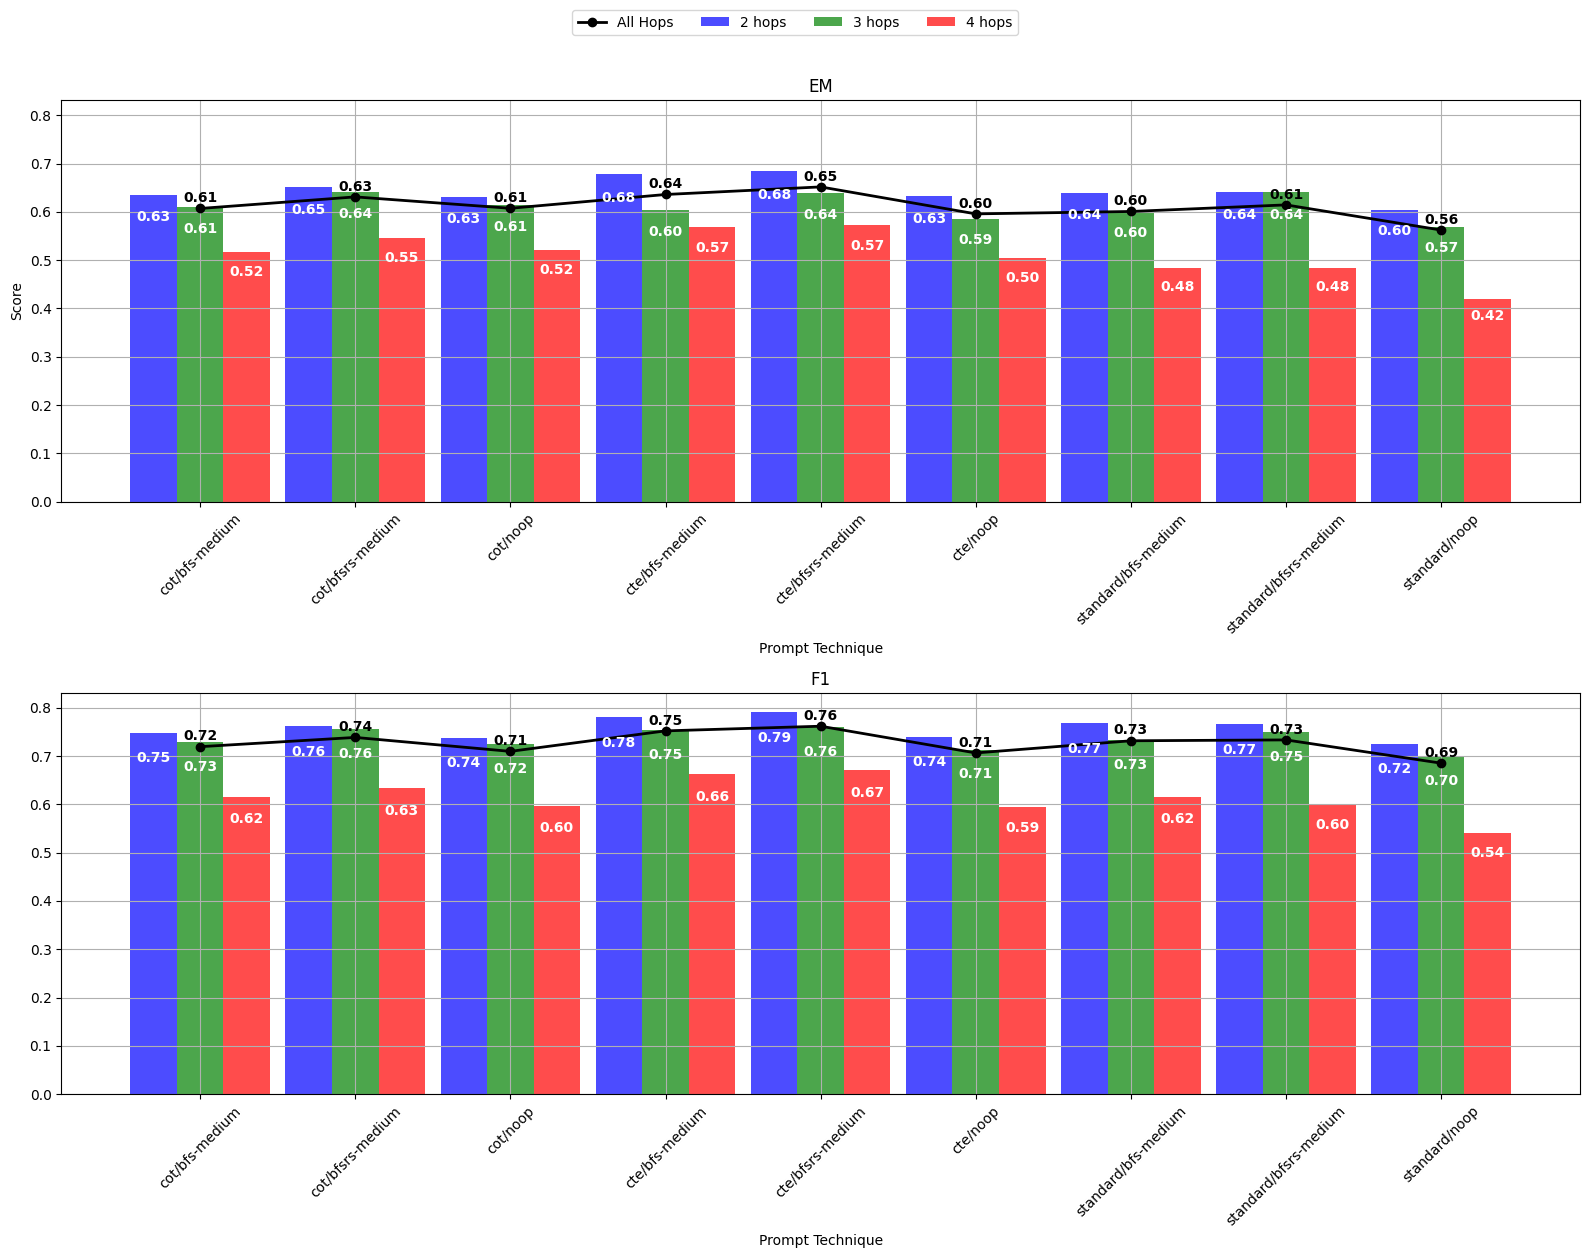

In [12]:
def plot_metric(ax, x, width, prompts, metrics, title, ylabel=None):
    bars_2hops = ax.bar(x - width, metrics["2hops"], width, label="2 hops", color="b", alpha=0.7)
    bars_3hops = ax.bar(x, metrics["3hops"], width, label="3 hops", color="g", alpha=0.7)
    bars_4hops = ax.bar(x + width, metrics["4hops"], width, label="4 hops", color="r", alpha=0.7)

    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values inside the bars, just below the top
    for bars in [bars_2hops, bars_3hops, bars_4hops]:
        for bar in bars:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() - (bar.get_height() * 0.05),
                f"{bar.get_height():.2f}",
                ha="center",
                va="top",
                fontsize=10,
                color="white",
                fontweight="bold",
            )

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value + 0.007,
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels([prompt.replace(".txt", "") for prompt in prompts], rotation=45)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)


# Creating subplots for Exact Match and F1, separating them for clarity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharey=True)

width = 0.3  # Bar width adjustment

prompts = [
    f"{pt}/{optim}"
    for pt, optim in zip(df_target["params.qa.technique"].values, df_target["params.train.optimizer"].values)
]
x = np.arange(len(prompts))


# Plotting Exact Match
metrics_em = {
    "2hops": df_target["metrics.2hops.exact_match"].values,
    "3hops": df_target["metrics.3hops.exact_match"].values,
    "4hops": df_target["metrics.4hops.exact_match"].values,
    "all": df_target["metrics.exact_match"].values,
}
plot_metric(ax1, x, width, prompts, metrics_em, title="EM", ylabel="Score")

# Plotting F1
metrics_f1 = {
    "2hops": df_target["metrics.2hops.f1"].values,
    "3hops": df_target["metrics.3hops.f1"].values,
    "4hops": df_target["metrics.4hops.f1"].values,
    "all": df_target["metrics.f1"].values,
}
plot_metric(ax2, x, width, prompts, metrics_f1, title="F1")

# Creating a shared legend outside the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout()
plt.show()